# Importing Libraries

In [ ]:
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import numpy as np
import keras
import cv2

# Loading Dataset

170508288/170498071 [==============================] - 4s 0us/step
x_train shape: (50000, 32, 32, 3)
50000
10000


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


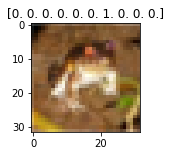

In [ ]:
num_classes = 10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("x_train shape:", x_train.shape)
print(x_train.shape[0])
print(x_test.shape[0])

y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

plt.figure(figsize = (2, 2))
plt.imshow(x_train[0])
plt.title(y_train[0])

x_train = np.array(x_train) / 255.0
x_test = np.array(x_test) / 255.0

# CNN Model

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(32, 32, 3)))
model.add(MaxPool2D())

model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

In [ ]:
opti = Adam(learning_rate=0.001)
model.compile(optimizer=opti, loss="categorical_crossentropy", metrics=["accuracy"])

history_cnn = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 100s 63ms/step - loss: 1.5669 - accuracy: 0.4211 - val_loss: 1.3506 - val_accuracy: 0.4999
Epoch 2/10
1563/1563 [==============================] - 92s 59ms/step - loss: 1.2048 - accuracy: 0.5672 - val_loss: 1.0350 - val_accuracy: 0.6327
Epoch 3/10
1563/1563 [==============================] - 94s 60ms/step - loss: 1.0445 - accuracy: 0.6265 - val_loss: 0.9404 - val_accuracy: 0.6690
Epoch 4/10
1563/1563 [==============================] - 94s 60ms/step - loss: 0.9557 - accuracy: 0.6615 - val_loss: 0.8872 - val_accuracy: 0.6957
Epoch 5/10
1563/1563 [==============================] - 95s 61ms/step - loss: 0.8999 - accuracy: 0.6796 - val_loss: 0.8750 - val_accuracy: 0.6896
Epoch 6/10
1563/1563 [==============================] - 95s 61ms/step - loss: 0.8432 - accuracy: 0.7010 - val_loss: 0.8141 - val_accuracy: 0.7180
Epoch 7/10
1563/1563 [==============================] - 96s 62ms/step - loss: 0.8102 - accuracy: 0.7134 - val_loss: 0.7634 

In [ ]:
model2 = Sequential()

model2.add(Flatten())
model2.add(Dense(1024, activation="relu"))
model2.add(Dense(512, activation="relu"))
model2.add(Dense(512, activation="relu"))
model2.add(Dense(256, activation="relu"))
model2.add(Dense(256, activation="relu"))
model2.add(Dense(10, activation="softmax"))

opti = Adam(learning_rate=0.001)
model2.compile(optimizer=opti, loss="categorical_crossentropy", metrics=["accuracy"])

history_dnn = model2.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.9124 - accuracy: 0.2960 - val_loss: 1.7878 - val_accuracy: 0.3501
Epoch 2/10
1563/1563 [==============================] - 57s 36ms/step - loss: 1.7366 - accuracy: 0.3724 - val_loss: 1.7060 - val_accuracy: 0.3779
Epoch 3/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.6512 - accuracy: 0.4045 - val_loss: 1.6104 - val_accuracy: 0.4268
Epoch 4/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.5938 - accuracy: 0.4229 - val_loss: 1.5789 - val_accuracy: 0.4354
Epoch 5/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.5523 - accuracy: 0.4384 - val_loss: 1.5516 - val_accuracy: 0.4389
Epoch 6/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.5094 - accuracy: 0.4534 - val_loss: 1.5318 - val_accuracy: 0.4474
Epoch 7/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.4766 - accuracy: 0.4683 - val_loss: 1.4813 -

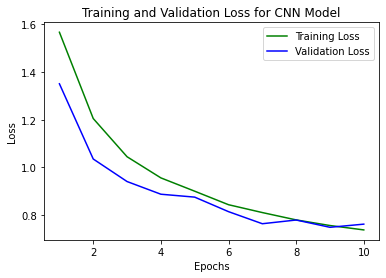

In [ ]:
loss_train_cnn = history_cnn.history['loss']
loss_val_cnn = history_cnn.history['val_loss']
epochs = range(1, 11)
plt.plot(epochs, loss_train_cnn, 'g', label='Training Loss')
plt.plot(epochs, loss_val_cnn, 'b', label='Validation Loss')
plt.title('Training and Validation Loss for CNN Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

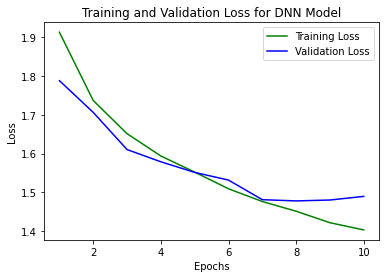

In [ ]:
loss_train_dnn = history_dnn.history['loss']
loss_val_dnn = history_dnn.history['val_loss']
epochs = range(1, 11)
plt.plot(epochs, loss_train_dnn, 'g', label='Training Loss')
plt.plot(epochs, loss_val_dnn, 'b', label='Validation Loss')
plt.title('Training and Validation Loss for DNN Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

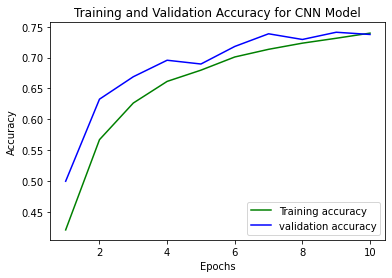

In [ ]:
acc_train_cnn = history_cnn.history['accuracy']
acc_val_cnn = history_cnn.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, acc_train_cnn, 'g', label='Training accuracy')
plt.plot(epochs, acc_val_cnn, 'b', label='validation accuracy')
plt.title('Training and Validation Accuracy for CNN Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

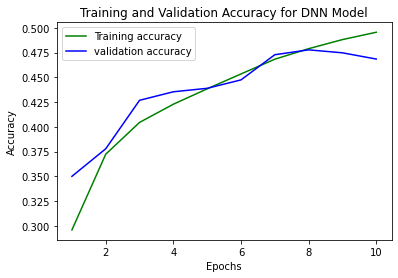

In [ ]:
acc_train_dnn = history_dnn.history['accuracy']
acc_val_dnn = history_dnn.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, acc_train_dnn, 'g', label='Training accuracy')
plt.plot(epochs, acc_val_dnn, 'b', label='validation accuracy')
plt.title('Training and Validation Accuracy for DNN Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()